<a href="https://colab.research.google.com/github/Rom9281/CS_DEV_TP3/blob/master/ProjetDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Data Mining

Romain GAUD and Maxime Curral

## Used Libraries

In [ ]:
import os
from PIL import Image
import numpy
import math
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
import json
import random
from os.path import exists
#from ipywidgets.widgets.widget_selection import ToggleButtons
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import ipywidgets as widgets
#from IPython.display import clear_output
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from PIL import Image
import warnings


## Data Collection
**NOTE:** Works on a google colab python notebook.

This part of the code is mostly extracted from [here](https://gist.github.com/jayspeidell/d10b84b8d3da52df723beacc5b15cb27).

In [ ]:
"""
!cd /
!pip install kaggle # Installing the kaggle API to automatically update the dB

api_token = {"username":"romaingaud","key":"a5d6baeac0e8b20f305272f58fc188df"} #Create a new token for each usage
# kaggle.com>Account>API>Create New API Token

import json
import zipfile
import os


!mkdir /content/images # Creating the folder were the raw data will be written
!mkdir /root/.kaggle # Creating the folder to write the API token

with open('/root/.kaggle/kaggle.json', 'w') as file: 
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json # Changing the permission on the kaggle file to protect it

!kaggle config path -p /content 
!kaggle datasets download -d puneet6060/intel-image-classification # Downloading

os.chdir('/content/images') # Changing folder to be in the raw data folder

for file in os.listdir(): # Unzipping and adding the photo's to content/data/
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()

"""

'\n!cd /\n!pip install kaggle # Installing the kaggle API to automatically update the dB\n\napi_token = {"username":"romaingaud","key":"a5d6baeac0e8b20f305272f58fc188df"} #Create a new token for each usage\n# kaggle.com>Account>API>Create New API Token\n\nimport json\nimport zipfile\nimport os\n\n\n!mkdir /content/images # Creating the folder were the raw data will be written\n!mkdir /root/.kaggle # Creating the folder to write the API token\n\nwith open(\'/root/.kaggle/kaggle.json\', \'w\') as file: \n    json.dump(api_token, file)\n\n!chmod 600 /root/.kaggle/kaggle.json # Changing the permission on the kaggle file to protect it\n\n!kaggle config path -p /content \n!kaggle datasets download -d puneet6060/intel-image-classification # Downloading\n\nos.chdir(\'/content/images\') # Changing folder to be in the raw data folder\n\nfor file in os.listdir(): # Unzipping and adding the photo\'s to content/data/\n    zip_ref = zipfile.ZipFile(file, \'r\')\n    zip_ref.extractall()\n    zip_ref

The code below is an alternate way to collect the images

In [ ]:

!mkdir /content/images # Creating the folder were the raw data will be written
os.chdir('/content/images') # Changing folder to be in the raw data folder
! git clone https://github.com/MaximeCurralCPE/Data-Mining.git
!mkdir /content/colors # Creating the folder were the raw data will be written
os.chdir('/content/colors') # Changing folder to be in the raw data folder
! git clone https://github.com/cheprasov/json-colors.git
!mkdir /content/images/Data-Mining/archive/seg_tested # Creating the folder were the raw data will be written

NameError: ignored

In [ ]:
"""
!pip install Pillow
!pip install exif
!cd /content/images

import PIL

img = PIL.Image.open('/content/images/seg_pred/seg_pred/10004.jpg')
print(img._getexif)
exif_data = img._getexif()
print(exif_data)
"""

"\n!pip install Pillow\n!pip install exif\n!cd /content/images\n\nimport PIL\n\nimg = PIL.Image.open('/content/images/seg_pred/seg_pred/10004.jpg')\nprint(img._getexif)\nexif_data = img._getexif()\nprint(exif_data)\n"

## Labeling and Annotation

We want to create a json file having the following information
{ name : ... ,
  path : ... ,
  main_color : ... ,
  enviroment : 
  building : 1,
  sea  : 0,
}

In [ ]:


'''
  Converts the rgb data to the closest color available.
  @PARAM : rgb = array containing the colors between 0 and 255
  @RET : a string with the name of the closest color
'''
def findName(rgb):
  
  dataframe=pd.read_json("/content/colors/json-colors/colors.json") # Importing all the color names and putting them into a dataframe

  dataframe['hex'] = dataframe['hex'].str[1:] # Taking out the hashtag out of the hex value

  # The following lines extract the hex values and convert it to an int for each main color (red, blue and green).
  # Then substracting it by the rgb values of the main color in the image
  dataframe['r'] = abs(dataframe['hex'].str[:2].apply(int, base=16) - rgb[0])
  dataframe['g'] = abs(dataframe['hex'].str[2:4].apply(int, base=16) - rgb[1])
  dataframe['b'] = abs(dataframe['hex'].str[4:6].apply(int, base=16) - rgb[2])

  dataframe['sum'] = (dataframe['r'] + dataframe['g'] + dataframe['b'])  # Summing the columns

  df_main_color = dataframe.loc[dataframe['sum'] == dataframe['sum'].min()] # Getting the minimum value of the sum which would be the closest color to the one entered
  
  color_name = df_main_color.head().iloc[0]['name'] # Acessing the str value of the row containing the minimum value (taking the first one if there are multiple ones)
  
  return  color_name

def getMainColor(image_analysis):
  num = 1 # number of clusters given by user

  imgfile = Image.open(image_analysis)

  numarray = numpy.array(imgfile.getdata(), numpy.uint8)
  clusters = KMeans(n_clusters = num) # adapting the algorithm to the number defined by the user
  clusters.fit(numarray)

  color_rgb = [
    math.ceil(clusters.cluster_centers_[0][0]), 
        math.ceil(clusters.cluster_centers_[0][1]),
    math.ceil(clusters.cluster_centers_[0][2])
  ]

  return findName(color_rgb)

In [ ]:


def saveJSON(data,result):

  photographer = ["Romain","Maxime","Michel","Denis","Jaquie","Fares"]

  for row in data:
    row.append(random.randint(1995,2021))
    row.append(photographer[random.randint(0,len(photographer)-1)])

  dataframe=pd.DataFrame(data,
                         columns=['environment','main_color','year','photographer'])
  resultframe=pd.DataFrame(result,
                           columns= ['result'])
  
  dataframe.to_json("/content/data.json")
  resultframe.to_json("/content/result.json")



Another methode adding data to the file along the way for piwidget, did not work.

In [ ]:
"""
  for i in range(len(data[0])):
    data[1].append(random.randint(1995,2021))
    data[2].append(photographer[random.randint(0,len(photographer)-1)])
"""

"""
def writeInfo(imgpath, environment, result):
  # VARIABLES
  
  photographer = ["Romain","Maxime","Michel","Denis","Jaquie","Fares"]
  train_path = "/content/images/Data-Mining/archive/seg_train/seg_train"

  # To add color ,getMainColor(imgpath)
  data = [environment,random.randint(1995,2021),photographer[random.randint(0,len(photographer)-1)]]
  result = [result]

  if(not (exists("/content/data.json") and exists("/content/result.json"))):

    dataframe=pd.read_json("/content/data.json", orient='index')
    resultframe=pd.read_json("/content/result.json", orient='index')

    print(dataframe)

    dataframe.append(pd.DataFrame(data, index=
                           ['environment','year','photographer']))
                           
    resultframe.append(pd.DataFrame(result,index=
                           ['result']))
    print(dataframe)
    
  
  else:
    # To add color ,'main_color'
    dataframe=pd.DataFrame(data,index=
                           ['environment','year','photographer'])
    resultframe=pd.DataFrame(result,index=
                           ['result'])

  print(imgpath, environment, result)
  json_data=''
  json_result =''
  dataframe.to_json(json_data)
  print(json_data)
  resultframe.to_json("/content/result.json")
"""

'\ndef writeInfo(imgpath, environment, result):\n  # VARIABLES\n  \n  photographer = ["Romain","Maxime","Michel","Denis","Jaquie","Fares"]\n  train_path = "/content/images/Data-Mining/archive/seg_train/seg_train"\n\n  # To add color ,getMainColor(imgpath)\n  data = [environment,random.randint(1995,2021),photographer[random.randint(0,len(photographer)-1)]]\n  result = [result]\n\n  if(not (exists("/content/data.json") and exists("/content/result.json"))):\n\n    dataframe=pd.read_json("/content/data.json", orient=\'index\')\n    resultframe=pd.read_json("/content/result.json", orient=\'index\')\n\n    print(dataframe)\n\n    dataframe.append(pd.DataFrame(data, index=\n                           [\'environment\',\'year\',\'photographer\']))\n                           \n    resultframe.append(pd.DataFrame(result,index=\n                           [\'result\']))\n    print(dataframe)\n    \n  \n  else:\n    # To add color ,\'main_color\'\n    dataframe=pd.DataFrame(data,index=\n          

## Data Analyses

We want the user to like or dislike a few images among those in the *seg_train* folder. Once they have liked/disliked 10 images, the algorithm below should be able to extract informations about the user's preferences such as their favorite environment or predominant color.

## Person generated likes

In [ ]:



def randomPicture():
  #randomly select the environment from which we take the image
  environment = random.choice(os.listdir("/content/images/Data-Mining/archive/seg_train"))

  filename_image = random.choice(os.listdir("/content/images/Data-Mining/archive/seg_train" +"/"+ str(environment)))

  #randomly select an image from the selected environment and display it to the user
  imgpath = "/content/images/Data-Mining/archive/seg_train"+ "/" + str(environment) + "/" + filename_image

  image = mpimg.imread(imgpath)
  imgplot = plt.imshow(image)

  return imgpath

# Tried using pywidgets, worked very poorly.


#ask the user if he likes the image
def chooseLike():
  data = []
  result = []
  flag = True

  while flag:
    path = randomPicture()

    print("Choose if you like the picture or not: L or D")
    print("Type E to exit")
    
    choice = input("")
    if choice in ['L','D','E']:
      if choice == 'L':
        result.append(['Like'])
        data.append([environment,getMainColor(path)])
      elif choice == 'D':
        result.append(['Dislike'])
        data.append([environment,getMainColor(path)])
      else:
        flag = False
        saveJSON(data,result)
    else:
      print("Wrong choice")


Tried using piwidget, did not work out well

In [ ]:
"""
def generateButton():
    buttons_list = [ widgets.Button(description="Like"), 
            widgets.Button(description="Dislike"),
            widgets.Button(description="Exit")]
    output = widgets.Output()

    for i,button in enumerate(buttons_list):
      display(button, output)
      if i==0:
        button.on_click(liked)
      elif i==1:
        button.on_click(disliked)
      else:
        button.on_click(exit)
"""

"""
def nextPicture(comment):
  data.append([environment])
  result.append([comment])
  print(data)
  from google.colab import output
  output.clear()
  randomPicture()
  generateButton()
"""
"""
def liked(b):
  nextPicture('Liked')

def disliked(b):
  nextPicture('Disliked')

def exit(b):
  saveJSON(data,result)
"""


"\ndef liked(b):\n  nextPicture('Liked')\n\ndef disliked(b):\n  nextPicture('Disliked')\n\ndef exit(b):\n  saveJSON(data,result)\n"

## Algorithm generated likes

To have more data available, it will simulate a person

In [ ]:
def simulateLike(limit):
  data = []
  result = []
  choice = ['Like','Dislike']
 

  for environment in os.listdir("/content/images/Data-Mining/archive/seg_train"):
    i=0
    print("[$] Loaded %s" %(environment,))
    for image in os.listdir("/content/images/Data-Mining/archive/seg_train" +"/"+ str(environment)):
      i+=1
      data.append([environment,getMainColor("/content/images/Data-Mining/archive/seg_train" +"/"+ str(environment)+"/"+image)])
      result.append([choice[random.randint(0,1)]])
      if i==limit:
        break
  
  saveJSON(data,result)


## Choosing between person or simulation

If you choose the simulation, you can put a limit on the number of images you wish to have of each environment, otherwise the time it takes the algorithm to run is very long.

In [ ]:
simulate = True
limit = 100

if simulate:
  simulateLike(limit)
else:
  chooseLike()

NameError: ignored

Generation d'une base de do

In [ ]:
dataframe=pd.read_json("/content/data.json")
resultframe=pd.read_json("/content/result.json")
#generating numerical labels

print(dataframe)

le2 = LabelEncoder()
dataframe['environment'] = le2.fit_transform(dataframe['environment'])

le3 = LabelEncoder()
dataframe['year'] = le3.fit_transform(dataframe['year'])

le4 = LabelEncoder()
dataframe['photographer'] = le4.fit_transform(dataframe['photographer'])

le5 = LabelEncoder()
dataframe['main_color'] = le5.fit_transform(dataframe['main_color'])

le6 = LabelEncoder()
resultframe['result'] = le6.fit_transform(resultframe['result'])



#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

print(dtc.feature_importances_)


NameError: ignored

## Data Visualization

## Making the predictions

After having created a model of what our client wants, we will now make predictions on some photos in the training set.

In [ ]:
def maketestDf(limit):
  data = []
  photographer = ["Romain","Maxime","Michel","Denis","Jaquie","Fares"]

  for environment in os.listdir("/content/images/Data-Mining/archive/seg_train"):
      i=0
      print("[$] Loaded %s" %(environment,))

      for image in os.listdir("/content/images/Data-Mining/archive/seg_train" +"/"+ str(environment)):
        i+=1

        info = [
                environment+'/'+image, 
                environment, 
                random.randint(1995,2021),
                photographer[random.randint(0,len(photographer)-1)],
                getMainColor("/content/images/Data-Mining/archive/seg_train/"+environment+"/"+image)
                ]

        try:
          with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            
            prediction = dtc.predict(
              [
                  [
                  le2.transform([info[1]])[0],
                  le3.transform([info[2]])[0], 
                  le4.transform([info[3]])[0],
                  le5.transform([info[4]])[0]
                  ]
              ])
            
            info.append(le6.inverse_transform(prediction)[0])

            data.append(info)

        except ValueError:
          print("[$] An unseen variable has been detected. It will be ignored.")
          pass
        
        if i==limit:
          break
        
  

  return pd.DataFrame(data,
                      columns = ['filename','environment','year','photographer','main_color','prediction'])


## Recommendation System

## Showing photos the client would like



[$] Loaded buildings
[$] Loaded street
[$] Loaded sea
[$] Loaded forest
[$] Loaded glacier
[$] Loaded mountain


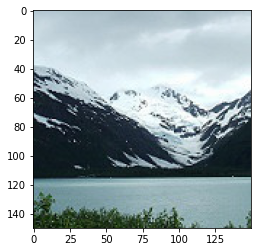

In [64]:
limit = 10

df = maketestDf(limit)
df_liked = df[df['prediction']=='Like']

first = df_liked.iloc[0]['filename']
image = mpimg.imread("/content/images/Data-Mining/archive/seg_train/"+first)
imgplot = plt.imshow(image)

## Report